[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/data_augmentation/vq_vae/vq_vae_cnn.ipynb)


In [ ]:
# Modelling Imports
import torch
import torch.nn as nn

# Training Imports
from tqdm import tqdm
from torch.optim import Adam

# Inference Imports
import torchvision
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **Dataset**

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=64, shuffle=True, num_workers=0) # loading the downloaded dataset

# **Modelling**

In [ ]:
from data_augmentation.vq_vae.model import VQVAE

# **Training**

In [ ]:
model = VQVAE().to(device)
optimizer = Adam(model.parameters(), lr=1E-3)

In [ ]:
for epoch_idx in range(20):

    for im, label in tqdm(mnist_loader):
        im = im.float().to(device)
        optimizer.zero_grad()

        # model output
        out, quantize_loss = model(im)

        # loss calculation
        recon_loss = torch.nn.MSELoss()(out, im)
        loss = recon_loss + quantize_loss

        loss.backward()
        optimizer.step()

    print('Finished epoch {}'.format(epoch_idx+1))

100%|██████████| 938/938 [00:35<00:00, 26.11it/s]


Finished epoch 1


100%|██████████| 938/938 [00:35<00:00, 26.25it/s]


Finished epoch 2


100%|██████████| 938/938 [00:40<00:00, 23.39it/s]


Finished epoch 3


100%|██████████| 938/938 [00:34<00:00, 26.80it/s]


Finished epoch 4


100%|██████████| 938/938 [00:33<00:00, 27.84it/s]


Finished epoch 5


100%|██████████| 938/938 [00:35<00:00, 26.61it/s]


Finished epoch 6


100%|██████████| 938/938 [00:34<00:00, 26.89it/s]


Finished epoch 7


100%|██████████| 938/938 [00:34<00:00, 26.83it/s]


Finished epoch 8


100%|██████████| 938/938 [00:34<00:00, 27.33it/s]


Finished epoch 9


100%|██████████| 938/938 [00:35<00:00, 26.35it/s]


Finished epoch 10


100%|██████████| 938/938 [00:35<00:00, 26.40it/s]


Finished epoch 11


100%|██████████| 938/938 [00:35<00:00, 26.79it/s]


Finished epoch 12


100%|██████████| 938/938 [00:34<00:00, 27.07it/s]


Finished epoch 13


100%|██████████| 938/938 [00:34<00:00, 26.82it/s]


Finished epoch 14


100%|██████████| 938/938 [00:35<00:00, 26.63it/s]


Finished epoch 15


100%|██████████| 938/938 [00:35<00:00, 26.70it/s]


Finished epoch 16


100%|██████████| 938/938 [00:34<00:00, 26.84it/s]


Finished epoch 17


100%|██████████| 938/938 [00:34<00:00, 27.25it/s]


Finished epoch 18


100%|██████████| 938/938 [00:35<00:00, 26.44it/s]


Finished epoch 19


100%|██████████| 938/938 [00:34<00:00, 26.89it/s]

Finished epoch 20


# **Inference**

In [ ]:
# Getting 100 random indexes
idxs = torch.randint(0, len(mnist)-1, (100, ))

# using these indexes to get images from mnist dataset and concatenating them
test_ims = torch.cat([mnist[idx][0][None, :] for idx in idxs]).float()

# generating images for the above test dataset
generated_im,_ = model(test_ims)

In [ ]:
generated_im = torch.clamp(generated_im, -1., 1.).detach().cpu() # clamping the generated images
generated_im = 0.5*generated_im + 0.5 #detransforming the images from [-1,1] to [0,1]

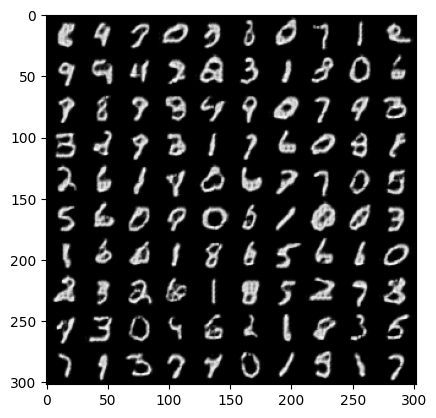

In [ ]:
# now printing the predicted images
grid = torchvision.utils.make_grid(generated_im, nrow=10)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(img, cmap='gray')